# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [7]:
url = "https://books.toscrape.com/"


OK


In [13]:
response = requests.get(url)

In [14]:
page_element = BeautifulSoup(response.text, "html.parser")

In [15]:
product_elements = page_element.select("article.product_pod") 

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [18]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."

    # YOUR CODE HERE
    image_tag = product_element.find("img")
    image_url = image_tag["src"]
    image_url = image_url.replace("../../", "")

    return image_url


Test your implementation by running the following cell.

In [19]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [21]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."

    # YOUR CODE HERE
    rating_map = {
        "One": 1,
        "Two": 2,
        "Three": 3,
        "Four": 4,
        "Five": 5
    }

    p_tag = product_element.find("p", class_="star-rating")

    for cls in p_tag["class"]:
        if cls in rating_map:
            return rating_map[cls]
    raise NotImplementedError()

Test your implementation by running the following cell.

In [22]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [25]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."

    # YOUR CODE HERE
    h3_tag = product_element.find("h3")
    a_tag = h3_tag.find("a")
    title = a_tag["title"]
    return title

Test your implementation by running the following cell.

In [26]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [29]:
def get_price(product_element):
    "Get the price of the given product element."

    # YOUR CODE HERE
    price_tag = product_element.find("p", class_="price_color")
    price_text = price_tag.text.strip()
    price_text = price_text.replace("Â", "").replace("£", "")
    price = float(price_text)
    return price

Test your implementation by running the following cell.

In [31]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [32]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [33]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [34]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [35]:
df = pd.DataFrame(product_data)

In [36]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [ ]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [37]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""

    # YOUR CODE HERE
    sns.countplot(x='rating', data=df, palette="viridis")
    plt.title("Number of Books by Rating")
    plt.xlabel("Rating")
    plt.ylabel("Number of Books")
    plt.show()

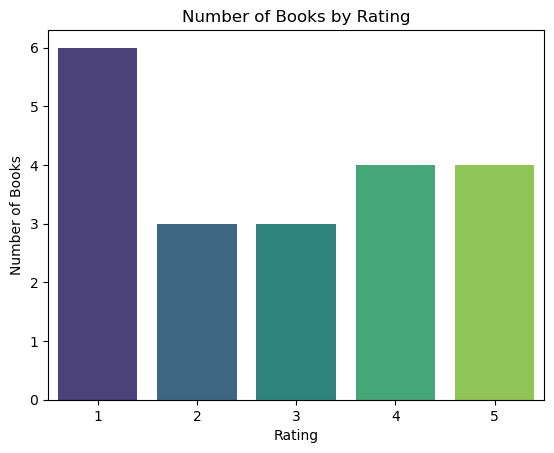

In [38]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [39]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""

    # YOUR CODE HERE
    sns.histplot(df['price'], bins=10, kde=True, color="skyblue")
    plt.title("Distribution of Book Prices")
    plt.xlabel("Price (£)")
    plt.ylabel("Number of Books")
    plt.show()

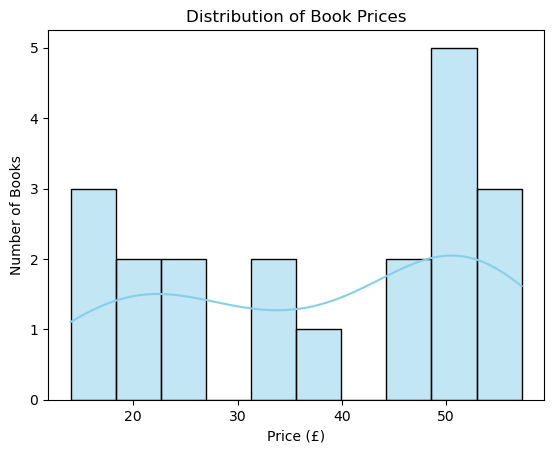

In [40]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [41]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""

    # YOUR CODE HERE
    df['title_length'] = df['title'].apply(len)
    sns.histplot(df['title_length'], bins=10, kde=True, color="lightgreen")
    plt.title("Distribution of Book Title Lengths")
    plt.xlabel("Title Length (number of characters)")
    plt.ylabel("Number of Books")
    plt.show()

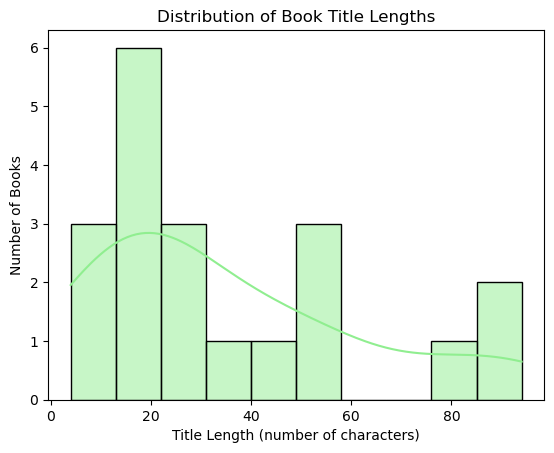

In [42]:
plot_title_length_distribution(df)

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [44]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""

    # YOUR CODE HERE
    sns.boxplot(x='rating', y='price', data=df, palette="pastel")
    plt.title("Price Distribution per Rating")
    plt.xlabel("Rating")
    plt.ylabel("Price (£)")
    plt.show()

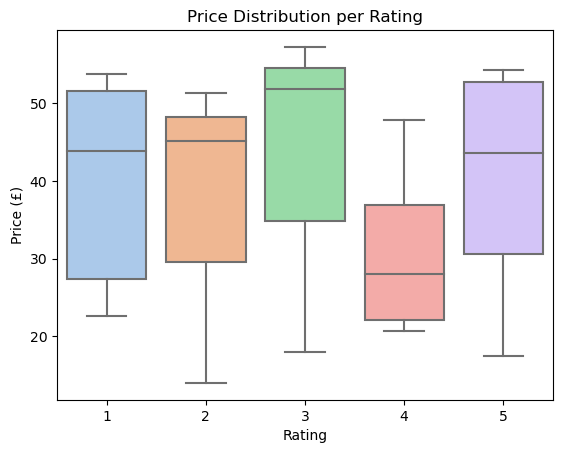

In [45]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [46]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""

    # YOUR CODE HERE
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Variables")
    plt.show()

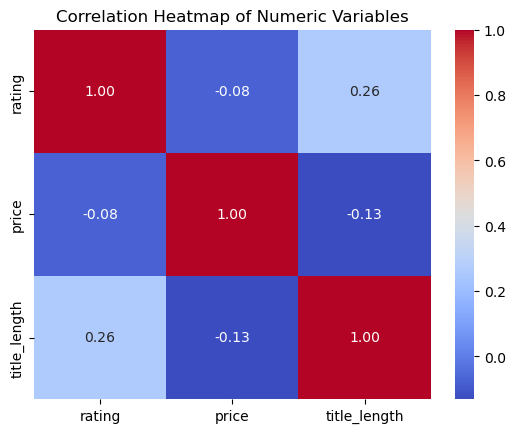

In [47]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [48]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """

    # YOUR CODE HERE
    grouped = df.groupby('rating')['price']
    stats = grouped.describe()
    stats = stats.rename(columns={'50%': 'median'})
    return stats


In [49]:
compute_descriptive_stats_for_price_per_rating(df)

,count,mean,std,min,25%,median,75%,max
rating,,,,,,,,
1,6.0,40.018333,14.178174,22.65,27.3075,43.845,51.6375,53.74
2,3.0,36.830000,20.018382,13.99,29.5800,45.170,48.2500,51.33
3,3.0,42.316667,21.296472,17.93,34.8500,51.770,54.5100,57.25
4,4.0,31.105000,12.460865,20.66,22.1150,27.970,36.9600,47.82
5,4.0,39.750000,17.186613,17.46,30.6300,43.655,52.7750,54.23
